In [23]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import imageio
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Activation,Dropout
import numpy as np

# Loading Data

No Right Turn
Keras-CNN.ipynb
Left Turn Only
RoadSign.ipynb
No Pedestrians
Untitled.ipynb
venv
Do Not Enter
One Way
No Turns
Wrong Way
Stop
Yield
.ipynb_checkpoints
(616, 100, 100, 3)
(616, 2)


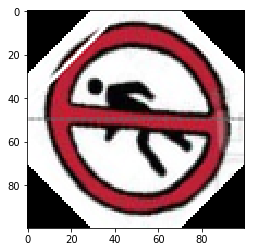

In [24]:
data_label = {}
x = []
y = []
for filename in os.listdir("."):
    print(filename)
    if not filename == "venv" and not filename[0] == "."  and (filename == "No Pedestrians" or filename == "Do Not Enter"):
        if os.path.isdir(filename):
            data_label[filename] = []
            syn = 1
            for picture in os.listdir("./" + str(filename)):
                if not picture[0] == "." and picture.split("_")[0] == "synthetic":
                    syn = imageio.imread("./" + str(filename) + "/" + picture)
                    x.append(syn)
                    if filename == "No Pedestrians":
                        y.append([1,0])
                    else:
                        y.append([0,1])
                    data_label[filename].append(syn)
                    

#print(data_label)

x = np.asarray(x).reshape(len(x),100,100,3)
y = np.asarray(y)
print(x.shape)
print(y.shape)
plt.imshow(data_label["No Pedestrians"][0])
                    

In [38]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='weighted')
        _val_recall = recall_score(val_targ, val_predict,average='weighted')
        _val_precision = precision_score(val_targ, val_predict,average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print (" — val_f1: " ,_val_f1)
        return

metrics = Metrics()

In [41]:
model = Sequential()
model.add(Conv2D(82, kernel_size=4, activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Conv2D(40, kernel_size=4, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=4, activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x, y,validation_data=(x,y), epochs=10,callbacks = [metrics])

Train on 616 samples, validate on 616 samples
Epoch 1/10
616/616 [==============================] - 28s 45ms/step - loss: 7.0840 - acc: 0.5536 - val_loss: 7.2865 - val_acc: 0.5455


/home/oleaccess/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/oleaccess/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 2/10
616/616 [==============================] - 27s 44ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 3/10
616/616 [==============================] - 30s 48ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 4/10
616/616 [==============================] - 29s 47ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 5/10
616/616 [==============================] - 28s 46ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 6/10
616/616 [==============================] - 28s 46ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 7/10
616/616 [==============================] - 28s 46ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 8/10
616/616 [==============================] - 28s 46ms/step - loss: 7.2865 - acc: 0.5455 - val_loss: 7.2865 - val_acc: 0.5455
Epoch 9/10
616/616 [==============================] - 29s 48ms